In [1]:
pip install diffusers==0.27.2 transformers datasets accelerate xformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
pip install --upgrade diffusers huggingface_hub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 101.8 MB/s eta 0:00:00
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.27.2
    Uninstalling diffusers-0.27.2:
      Successfully uninstalled diffusers-0.27.2


In [3]:
from diffusers import StableDiffusionPipeline
import torch

# Load pretrained pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",

    torch_dtype=torch.float16
).to("cuda")

# Prompt
prompt = "a woman with blonde hair and black eye"

# Generate image
with torch.no_grad():
    image = pipe(prompt).images[0]

# Save the image
image.save("before_finetune.png")
image.show()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

## Load dataset

In [4]:
from datasets import load_dataset
from torchvision import transforms

# Load Naruto dataset
dataset = load_dataset("lambdalabs/naruto-blip-captions", split="train[:1000]")


# Preprocessing for images + captions
preprocess = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5]),
])

def transform(example):
    image = example["image"].convert("RGB")
    image = preprocess(image)
    example["pixel_values"] = image
    example["prompt"] = example["text"]  # Use the BLIP-generated caption
    return example

# Apply transform
dataset = dataset.map(transform)
dataset.set_format(type="torch", columns=["pixel_values", "prompt"])


README.md:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


dataset_infos.json:   0%|          | 0.00/897 [00:00<?, ?B/s]

(…)-00000-of-00002-12944970063701d5.parquet:   0%|          | 0.00/344M [00:00<?, ?B/s]

(…)-00001-of-00002-cefa2f480689f147.parquet:   0%|          | 0.00/357M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1221 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

## Load Pipeline, Freeze Components, and Set Up Training

In [5]:
from transformers import CLIPTokenizer
from torch.utils.data import DataLoader
from diffusers import DDPMScheduler, StableDiffusionPipeline
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to(device)

# 🔁 Convert all components to float32
pipe.vae = pipe.vae.to(torch.float32)
pipe.text_encoder = pipe.text_encoder.to(torch.float32)
pipe.unet = pipe.unet.to(torch.float32)

# Freeze CLIP and VAE
pipe.vae.requires_grad_(False)
pipe.text_encoder.requires_grad_(False)
for param in pipe.vae.parameters():
    param.requires_grad = False
for param in pipe.text_encoder.parameters():
    param.requires_grad = False

# Unfreeze U-Net for training
pipe.unet.train()
for param in pipe.unet.parameters():
    param.requires_grad = True

# Tokenizer and scheduler
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
noise_scheduler = DDPMScheduler.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="scheduler")

# DataLoader
train_loader = DataLoader(dataset, batch_size=4, shuffle=True)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

## Fine tune

In [6]:
import torch.nn as nn
from tqdm import tqdm

# Enable training
pipe.unet.train()
for param in pipe.unet.parameters():
    param.requires_grad = True

# Safer optimizer config
optimizer = torch.optim.Adam(pipe.unet.parameters(), lr=1e-5)
EPOCHS = 5

for epoch in range(EPOCHS):
    pbar = tqdm(train_loader)
    for batch in pbar:
        # Use float32 instead of float16 to avoid precision issues
        pixel_values = batch["pixel_values"].to(device, dtype=torch.float32)
        captions = batch["prompt"]

        # Tokenize captions
        input_ids = tokenizer(captions, padding="max_length", truncation=True, return_tensors="pt").input_ids.to(device)
        encoder_hidden_states = pipe.text_encoder(input_ids)[0]

        # Encode to latents and scale
        latents = pipe.vae.encode(pixel_values).latent_dist.sample() * 0.18215

        # Add noise
        noise = torch.randn_like(latents)
        timesteps = torch.randint(0, noise_scheduler.config.num_train_timesteps, (latents.shape[0],), device=device).long()
        noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

        # U-Net prediction
        noise_pred = pipe.unet(noisy_latents, timesteps, encoder_hidden_states).sample

        # ⚠️ Skip batch if NaNs are present
        if torch.isnan(noise_pred).any():
            print("⚠️ NaNs detected — skipping batch.")
            continue

        # Loss calculation
        loss = nn.MSELoss()(noise_pred, noise)

        # Backprop
        optimizer.zero_grad()
        loss.backward()

        # 🔒 Gradient clipping
        torch.nn.utils.clip_grad_norm_(pipe.unet.parameters(), max_norm=1.0)

        optimizer.step()

        pbar.set_description(f"Epoch {epoch+1} | Loss: {loss.item():.4f}")


Epoch 1 | Loss: 0.0733: 100%|██████████| 250/250 [02:52<00:00,  1.45it/s]
Epoch 2 | Loss: 0.0436: 100%|██████████| 250/250 [02:51<00:00,  1.46it/s]
Epoch 3 | Loss: 0.0385: 100%|██████████| 250/250 [02:51<00:00,  1.46it/s]
Epoch 4 | Loss: 0.0322: 100%|██████████| 250/250 [02:51<00:00,  1.46it/s]
Epoch 5 | Loss: 0.1695: 100%|██████████| 250/250 [02:51<00:00,  1.46it/s]


## Save the model

In [7]:
pipe.unet.save_pretrained("./finetuned_unet")


## Generate after fine tuning

In [8]:
from diffusers import UNet2DConditionModel

# Reload pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    "nitrosocke/mo-di-diffusion",
    safety_checker=None,
    torch_dtype=torch.float32,
).to("cuda")



# Load fine-tuned U-Net
pipe.unet = UNet2DConditionModel.from_pretrained(
    "./finetuned_unet",
    torch_dtype=torch.float32
).to("cuda")

# Generate image with same prompt
prompt = "a woman with blonde hair and black eye"
image = pipe(prompt).images[0]

output = pipe(prompt, output_type="latent")  # or `images` for final
print(torch.isnan(output.images[0]).any())

image.save("after_finetune.png")
image.show()


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/576 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--nitrosocke--mo-di-diffusion/snapshots/e3106d24aa8c37bf856257daea2ae789eabc4d70/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--nitrosocke--mo-di-diffusion/snapshots/e3106d24aa8c37bf856257daea2ae789eabc4d70/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--nitrosocke--mo-di-diffusion/snapshots/e3106d24aa8c37bf856257daea2ae789eabc4d70/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--nitrosocke--mo-di-diffusion/snapshots/e3106d24aa8c37bf856257daea2ae789eabc4d70/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diff

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

tensor(False, device='cuda:0')


## Evaluation

### i. CLIP Score evaluation

In [9]:
from diffusers import StableDiffusionPipeline, UNet2DConditionModel
from transformers import CLIPProcessor, CLIPModel
import torch
from PIL import Image
import os

# ------------------- Setup -------------------
device = "cuda" if torch.cuda.is_available() else "cpu"

# Prompts for evaluation
prompts = [
    "A girl with brown hair and bright blue eyes wearing a pink kimono",
    "A boy in a yukata watching fireworks at night",
    "A fantasy anime landscape with a torii gate and glowing lanterns",
    "A cat wearing a tiny kimono sitting on a tatami mat"
]

os.makedirs("outputs/base", exist_ok=True)
os.makedirs("outputs/finetuned", exist_ok=True)

# ------------------- Load CLIP -------------------
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

def compute_clip_score(prompt, image):
    inputs = clip_processor(text=prompt, images=image, return_tensors="pt", padding=True).to(device)
    outputs = clip_model(**inputs)
    return outputs.logits_per_image.item()

# ------------------- Load Pretrained Pipeline -------------------
pipe_base = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
        safety_checker=None,
    torch_dtype=torch.float16
).to(device)

# ------------------- Load Fine-tuned Pipeline -------------------
pipe_finetuned = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    safety_checker=None,
    torch_dtype=torch.float32
).to(device)

pipe_finetuned.unet = UNet2DConditionModel.from_pretrained(
    "./finetuned_unet",
    torch_dtype=torch.float32
).to(device)

# ------------------- Generate, Save & Score -------------------
results = []

for i, prompt in enumerate(prompts):
    # ---- Pretrained ----
    with torch.no_grad():
        image_base = pipe_base(prompt).images[0]
    image_base.save(f"outputs/base/img_{i+1}.png")
    base_score = compute_clip_score(prompt, image_base)

    # ---- Fine-tuned ----
    with torch.no_grad():
        image_finetuned = pipe_finetuned(prompt).images[0]
    image_finetuned.save(f"outputs/finetuned/img_{i+1}.png")
    finetuned_score = compute_clip_score(prompt, image_finetuned)

    # ---- Log result ----
    results.append({
        "prompt": prompt,
        "base_score": round(base_score, 4),
        "finetuned_score": round(finetuned_score, 4),
        "improvement": round(finetuned_score - base_score, 4)
    })

# ------------------- Display Comparison -------------------
import pandas as pd
df = pd.DataFrame(results)
print(df.to_markdown(index=False))

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

| prompt                                                            |   base_score |   finetuned_score |   improvement |
|:------------------------------------------------------------------|-------------:|------------------:|--------------:|
| A girl with brown hair and bright blue eyes wearing a pink kimono |      35.9449 |           34.0634 |       -1.8815 |
| A boy in a yukata watching fireworks at night                     |      35.9206 |           35.3165 |       -0.604  |
| A fantasy anime landscape with a torii gate and glowing lanterns  |      37.617  |           38.724  |        1.107  |
| A cat wearing a tiny kimono sitting on a tatami mat               |      32.7722 |           30.0531 |       -2.7191 |


In [10]:
# import ipywidgets as widgets
# from IPython.display import display

# upload_widget = widgets.FileUpload(accept='image/*', multiple=True)
# display(upload_widget)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

| prompt                                                            |   before_score |   after_score |   improvement |
|:------------------------------------------------------------------|---------------:|--------------:|--------------:|
| A girl with brown hair and bright blue eyes wearing a pink kimono |        35.8698 |       35.1996 |       -0.6702 |
| A boy in a yukata watching fireworks at night                     |        37.5618 |       35.7883 |       -1.7735 |
Prompt: A girl with brown hair and bright blue eyes wearing a pink kimono
Before image:


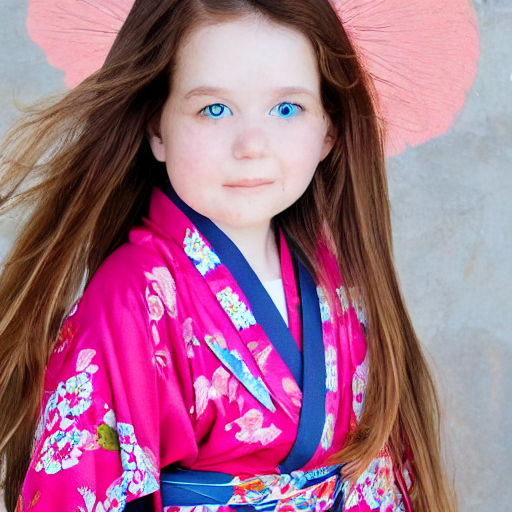

After image:


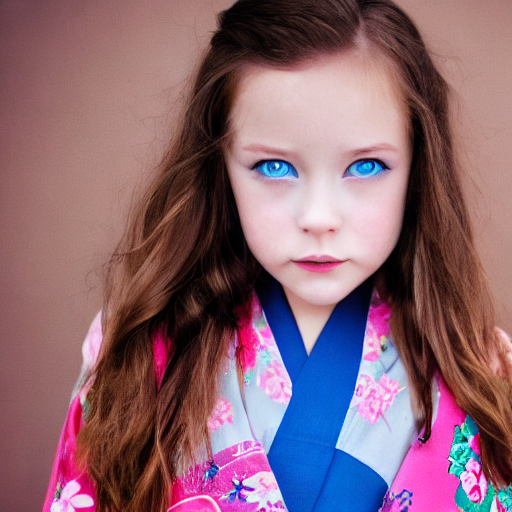

Prompt: A boy in a yukata watching fireworks at night
Before image:


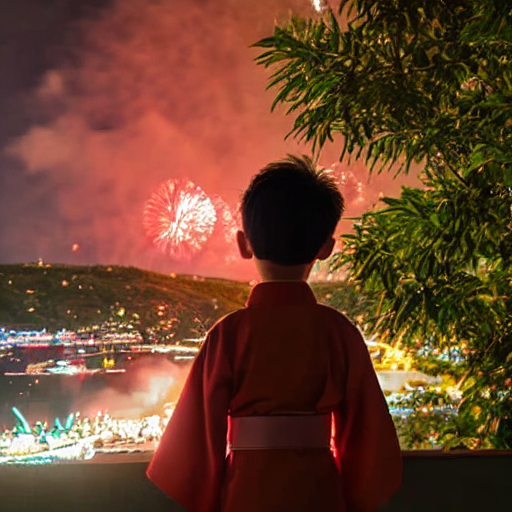

After image:


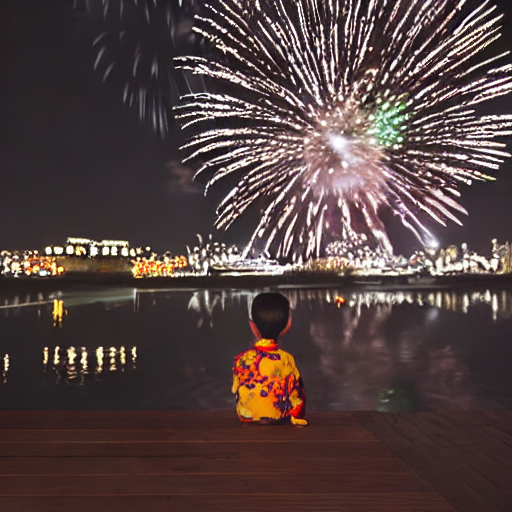

In [11]:
from PIL import Image
import torch
from transformers import CLIPModel, CLIPProcessor
from diffusers import StableDiffusionPipeline
import os

# Setup device and load CLIP model and processor
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Function to compute CLIP score given a prompt and image
def compute_clip_score(prompt, image):
    inputs = clip_processor(text=prompt, images=image, return_tensors="pt", padding=True).to(device)
    outputs = clip_model(**inputs)
    return outputs.logits_per_image.item()

# ------------------- Setup Stable Diffusion Pipeline -------------------
pipe_base = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    safety_checker=None,
    torch_dtype=torch.float16
).to(device)

pipe_finetuned = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    safety_checker=None,
    torch_dtype=torch.float32
).to(device)

# ------------------- Generate Images -------------------
prompts = [
    "A girl with brown hair and bright blue eyes wearing a pink kimono",
    "A boy in a yukata watching fireworks at night"
]

# Initialize directories for saving output images
os.makedirs("outputs/base", exist_ok=True)
os.makedirs("outputs/finetuned", exist_ok=True)

# Function to generate images from prompts
def generate_and_save_images(prompt, index):
    # Generate image using base model (pretrained)
    image_base = pipe_base(prompt).images[0]
    image_base.save(f"outputs/base/img_{index + 1}.png")

    # Generate image using fine-tuned model
    image_finetuned = pipe_finetuned(prompt).images[0]
    image_finetuned.save(f"outputs/finetuned/img_{index + 1}.png")

    return image_base, image_finetuned

# ------------------- Compare Images Using CLIP -------------------
results = []
for i, prompt in enumerate(prompts):
    # Generate images
    image_before, image_after = generate_and_save_images(prompt, i)

    # Compute CLIP scores
    before_score = compute_clip_score(prompt, image_before)
    after_score = compute_clip_score(prompt, image_after)
    improvement = after_score - before_score

    # Log results
    results.append({
        "prompt": prompt,
        "before_score": round(before_score, 4),
        "after_score": round(after_score, 4),
        "improvement": round(improvement, 4)
    })

# ------------------- Display Results -------------------
import pandas as pd
df = pd.DataFrame(results)
print(df.to_markdown(index=False))

# Optionally display images side-by-side
from IPython.display import display
for i, prompt in enumerate(prompts):
    print(f"Prompt: {prompt}")
    image_before = Image.open(f"outputs/base/img_{i + 1}.png")
    image_after = Image.open(f"outputs/finetuned/img_{i + 1}.png")
    print("Before image:")
    display(image_before)
    print("After image:")
    display(image_after)


### ii. FID (Fréchet Inception Distance)

In [12]:
!pip install pytorch-fid lpips

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 5.4 MB/s eta 0:00:00


In [13]:
import os
import torch
from diffusers import StableDiffusionPipeline, UNet2DConditionModel
from PIL import Image

# Create directories
before_images_dir = "./before_images"
after_images_dir = "./after_images"
os.makedirs(before_images_dir, exist_ok=True)
os.makedirs(after_images_dir, exist_ok=True)

# Clear CUDA cache
torch.cuda.empty_cache()

# Test prompts
test_prompts = [
    "a ninja jumping through trees",
    "a warrior with a headband and blonde hair",
    "two ninjas fighting with special powers",
    "a ramen shop in a hidden village"
]

# Generate with vanilla model in float16
for i, prompt in enumerate(test_prompts):
    vanilla_pipe = StableDiffusionPipeline.from_pretrained(
        "runwayml/stable-diffusion-v1-5",
        torch_dtype=torch.float16
    ).to("cuda")

    vanilla_image = vanilla_pipe(prompt, guidance_scale=7.5).images[0]
    vanilla_image.save(f"{before_images_dir}/{i}.png")

    # Delete the pipeline to free memory
    del vanilla_pipe
    torch.cuda.empty_cache()

# Now generate with fine-tuned model - IMPORTANT: Match the precision!
for i, prompt in enumerate(test_prompts):
    # Load in float32 since that's how the model was trained
    fine_tuned_pipe = StableDiffusionPipeline.from_pretrained(
        "runwayml/stable-diffusion-v1-5",
        torch_dtype=torch.float32  # Match the precision of your trained model
    ).to("cuda")

    # Load the fine-tuned UNet with matching precision
    fine_tuned_pipe.unet = UNet2DConditionModel.from_pretrained(
        "./finetuned_unet",
        torch_dtype=torch.float32  # Match the precision of your trained model
    ).to("cuda")

    fine_tuned_image = fine_tuned_pipe(
        prompt,
        guidance_scale=7.5,
        num_inference_steps=30  # Fewer steps to reduce memory
    ).images[0]

    fine_tuned_image.save(f"{after_images_dir}/{i}.png")

    # Delete the pipeline to free memory
    del fine_tuned_pipe
    torch.cuda.empty_cache()

# Now install pytorch-fid for evaluation (if not already installed)
# !pip install pytorch-fid

# Calculate FID score (after both sets of images are generated)
from pytorch_fid import fid_score
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

fid_value = fid_score.calculate_fid_given_paths(
    [before_images_dir, after_images_dir],
    batch_size=1,
    device=device,
    dims=2048
)
print(f"FID Score: {fid_value}")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:00<00:00, 417MB/s]
100%|██████████| 4/4 [00:00<00:00, 11.15it/s]


FID Score: 483.02750934481816


### iii. Inception Score (Measures both quality and diversity of generated images)

In [14]:
from torch.nn import functional as F
from torchvision.models import inception_v3
import torchvision.transforms as transforms
import os
import numpy as np
from PIL import Image

def get_inception_score(images, batch_size=32, splits=10):
    # Load inception model
    inception_model = inception_v3(pretrained=True, transform_input=False).to(device)
    inception_model.eval()

    # Define preprocessing
    preprocess = transforms.Compose([
        transforms.Resize((299, 299)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Preprocess images
    preprocessed_images = []
    for img in images:
        preprocessed_images.append(preprocess(img).unsqueeze(0))

    # Concatenate all images
    preprocessed_images = torch.cat(preprocessed_images, dim=0)

    # Get predictions
    preds = []
    for i in range(0, len(preprocessed_images), batch_size):
        batch = preprocessed_images[i:i+batch_size].to(device)
        with torch.no_grad():
            pred = F.softmax(inception_model(batch), dim=1)
        preds.append(pred.cpu())

    preds = torch.cat(preds, dim=0).numpy()

    # Calculate inception score
    scores = []
    for i in range(splits):
        part = preds[i * (len(preds) // splits): (i + 1) * (len(preds) // splits), :]
        kl = part * (np.log(part) - np.log(np.expand_dims(np.mean(part, 0), 0)))
        kl = np.mean(np.sum(kl, 1))
        scores.append(np.exp(kl))

    return np.mean(scores), np.std(scores)

# Load images
vanilla_images = [Image.open(f"{before_images_dir}/{i}.png") for i in range(len(test_prompts))]
fine_tuned_images = [Image.open(f"{after_images_dir}/{i}.png") for i in range(len(test_prompts))]

# Calculate inception scores
vanilla_is, vanilla_is_std = get_inception_score(vanilla_images)
fine_tuned_is, fine_tuned_is_std = get_inception_score(fine_tuned_images)

print(f"Inception Score (Vanilla): {vanilla_is} ± {vanilla_is_std}")
print(f"Inception Score (Fine-tuned): {fine_tuned_is} ± {fine_tuned_is_std}")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 209MB/s]
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/us

Inception Score (Vanilla): nan ± nan
Inception Score (Fine-tuned): nan ± nan


### iv. LPIPS (Learned Perceptual Image Patch Similarity)

In [15]:
# Generate a set of images from the Naruto dataset
naruto_samples = dataset.select(range(10))

# Save these images
naruto_dir = "./naruto_samples"
os.makedirs(naruto_dir, exist_ok=True)

for i, sample in enumerate(naruto_samples):
    img = transforms.ToPILImage()(sample['pixel_values'] * 0.5 + 0.5)  # Denormalize
    img.save(f"{naruto_dir}/{i}.png")

# Use the same prompts to generate images from your fine-tuned model
# Compare them visually

# Optionally, use a perceptual similarity metric like LPIPS
from lpips import LPIPS

lpips_fn = LPIPS(net='alex').to(device)

vanilla_lpips = []
fine_tuned_lpips = []

for i in range(min(len(naruto_samples), len(test_prompts))):
    naruto_img = transforms.ToTensor()(Image.open(f"{naruto_dir}/{i}.png")).unsqueeze(0).to(device)
    vanilla_img = transforms.ToTensor()(Image.open(f"{before_images_dir}/{i}.png")).unsqueeze(0).to(device)
    fine_tuned_img = transforms.ToTensor()(Image.open(f"{after_images_dir}/{i}.png")).unsqueeze(0).to(device)

    vanilla_dist = lpips_fn(naruto_img, vanilla_img).item()
    fine_tuned_dist = lpips_fn(naruto_img, fine_tuned_img).item()

    vanilla_lpips.append(vanilla_dist)
    fine_tuned_lpips.append(fine_tuned_dist)

print(f"Average LPIPS (Vanilla): {sum(vanilla_lpips)/len(vanilla_lpips)}")
print(f"Average LPIPS (Fine-tuned): {sum(fine_tuned_lpips)/len(fine_tuned_lpips)}")
# Lower LPIPS means more similar images

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 215MB/s]


Loading model from: /usr/local/lib/python3.11/dist-packages/lpips/weights/v0.1/alex.pth
Average LPIPS (Vanilla): 0.7343866378068924
Average LPIPS (Fine-tuned): 0.7389309704303741


### v. Training/Validation Loss Curves

Epoch 1 | Loss: 0.1285: 100%|██████████| 225/225 [01:33<00:00,  2.41it/s]
Validating: 100%|██████████| 25/25 [00:05<00:00,  4.68it/s]


Epoch 1 | Train Loss: 0.0858 | Val Loss: 0.0867


Epoch 2 | Loss: 0.0449: 100%|██████████| 225/225 [01:32<00:00,  2.43it/s]
Validating: 100%|██████████| 25/25 [00:05<00:00,  4.63it/s]


Epoch 2 | Train Loss: 0.0879 | Val Loss: 0.0919


Epoch 3 | Loss: 0.1697: 100%|██████████| 225/225 [01:32<00:00,  2.42it/s]
Validating: 100%|██████████| 25/25 [00:05<00:00,  4.62it/s]


Epoch 3 | Train Loss: 0.0912 | Val Loss: 0.0873


Epoch 4 | Loss: 0.0125: 100%|██████████| 225/225 [01:32<00:00,  2.42it/s]
Validating: 100%|██████████| 25/25 [00:05<00:00,  4.68it/s]


Epoch 4 | Train Loss: 0.0842 | Val Loss: 0.0869


Epoch 5 | Loss: 0.0670: 100%|██████████| 225/225 [01:32<00:00,  2.43it/s]
Validating: 100%|██████████| 25/25 [00:05<00:00,  4.65it/s]


Epoch 5 | Train Loss: 0.0917 | Val Loss: 0.0956


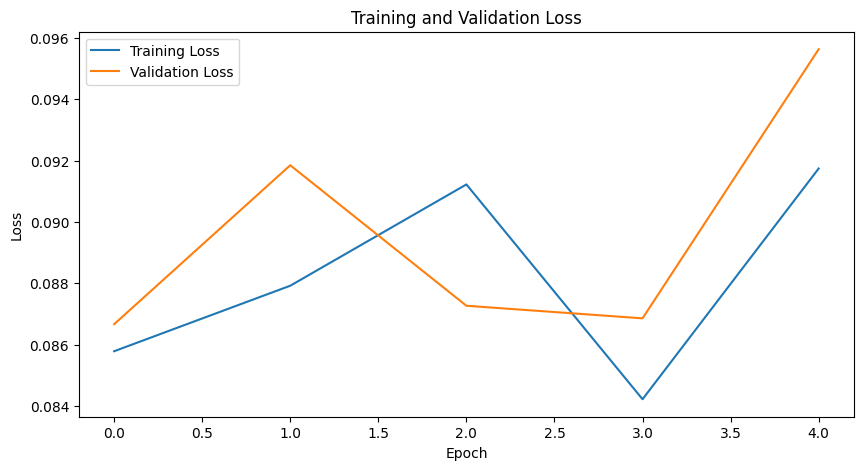

In [16]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm

# First, make sure everything is in the same precision
# Either convert everything to float16:
precision = torch.float16

# OR convert everything to float32:
# precision = torch.float32

# Set pipeline to the chosen precision
pipe.vae = pipe.vae.to(precision)
pipe.text_encoder = pipe.text_encoder.to(precision)
pipe.unet = pipe.unet.to(precision)

# Split dataset into training and validation
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

# Initialize lists to store losses
train_losses = []
val_losses = []

# Training loop
for epoch in range(EPOCHS):
    # Training
    epoch_loss = 0
    pipe.unet.train()
    pbar = tqdm(train_loader)
    for batch_idx, batch in enumerate(pbar):
        # Get pixel values and prompts - match precision with the VAE
        pixel_values = batch["pixel_values"].to(device, dtype=precision)
        captions = batch["prompt"]

        # Tokenize captions
        input_ids = tokenizer(captions, padding="max_length", truncation=True, return_tensors="pt").input_ids.to(device)
        encoder_hidden_states = pipe.text_encoder(input_ids)[0]

        # Encode to latents and scale
        latents = pipe.vae.encode(pixel_values).latent_dist.sample() * 0.18215

        # Add noise
        noise = torch.randn_like(latents)
        timesteps = torch.randint(0, noise_scheduler.config.num_train_timesteps, (latents.shape[0],), device=device).long()
        noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

        # U-Net prediction
        noise_pred = pipe.unet(noisy_latents, timesteps, encoder_hidden_states).sample

        # Skip batch if NaNs are present
        if torch.isnan(noise_pred).any():
            print("⚠️ NaNs detected — skipping batch.")
            continue

        # Loss calculation
        loss = nn.MSELoss()(noise_pred, noise)

        # Backprop
        optimizer.zero_grad()
        loss.backward()

        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(pipe.unet.parameters(), max_norm=1.0)

        optimizer.step()

        # Record loss
        epoch_loss += loss.item()
        pbar.set_description(f"Epoch {epoch+1} | Loss: {loss.item():.4f}")

    avg_train_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    pipe.unet.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validating"):
            pixel_values = batch["pixel_values"].to(device, dtype=precision)
            captions = batch["prompt"]

            # Tokenize captions
            input_ids = tokenizer(captions, padding="max_length", truncation=True, return_tensors="pt").input_ids.to(device)
            encoder_hidden_states = pipe.text_encoder(input_ids)[0]

            # Encode to latents and scale
            latents = pipe.vae.encode(pixel_values).latent_dist.sample() * 0.18215

            # Add noise
            noise = torch.randn_like(latents)
            timesteps = torch.randint(0, noise_scheduler.config.num_train_timesteps, (latents.shape[0],), device=device).long()
            noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

            # U-Net prediction
            noise_pred = pipe.unet(noisy_latents, timesteps, encoder_hidden_states).sample

            # Loss calculation
            val_batch_loss = nn.MSELoss()(noise_pred, noise).item()
            val_loss += val_batch_loss

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

# Plot losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('loss_curve.png')
plt.show()

## UI

In [17]:
!pip install -q streamlit pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 123.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 133.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.6 MB/s eta 0:00:00


In [18]:
with open("app1.py", "w") as f:
    f.write("""
import streamlit as st
import torch
from diffusers import StableDiffusionPipeline, UNet2DConditionModel
from transformers import CLIPTokenizer
from PIL import Image
import os
import time

st.title("🌀 Naruto Diffusion: Before vs After Fine-Tuning")

@st.cache_resource
def load_pipelines():
    device = "cuda" if torch.cuda.is_available() else "cpu"

    pipe_before = StableDiffusionPipeline.from_pretrained(
        "runwayml/stable-diffusion-v1-5",
        safety_checker=None,
        torch_dtype=torch.float32
    ).to(device)

    pipe_after = StableDiffusionPipeline.from_pretrained(
        "runwayml/stable-diffusion-v1-5",
        safety_checker=None,
        torch_dtype=torch.float32
    ).to(device)

    pipe_after.unet = UNet2DConditionModel.from_pretrained(
        "./finetuned_unet",
        torch_dtype=torch.float32
    ).to(device)

    tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-large-patch14")
    return pipe_before, pipe_after, tokenizer

pipe_before, pipe_after, tokenizer = load_pipelines()

prompt = st.text_input("Enter your prompt")

if prompt:
    st.markdown(f"**Prompt:** {prompt}")
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids
    st.markdown(f"**Token Count:** {input_ids.shape[-1]} tokens")

    # BEFORE
    torch.cuda.reset_peak_memory_stats()
    start_time = time.time()
    with st.spinner("Generating image before fine-tuning..."):
        image_before = pipe_before(prompt).images[0]
    time_before = time.time() - start_time
    mem_before = torch.cuda.max_memory_allocated() / 1e6 if torch.cuda.is_available() else 0

    # AFTER
    torch.cuda.reset_peak_memory_stats()
    start_time = time.time()
    with st.spinner("Generating image after fine-tuning..."):
        image_after = pipe_after(prompt).images[0]
    time_after = time.time() - start_time
    mem_after = torch.cuda.max_memory_allocated() / 1e6 if torch.cuda.is_available() else 0

    # Display side-by-side
    col1, col2 = st.columns(2)
    with col1:
        st.image(image_before, caption=f"🔵 Before Fine-Tuning\\n⏱ {time_before:.2f}s | 🧠 {mem_before:.0f} MB")
    with col2:
        st.image(image_after, caption=f"🟢 After Fine-Tuning\\n⏱ {time_after:.2f}s | 🧠 {mem_after:.0f} MB")
""")


In [19]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
added 22 packages in 1s
⠋
⠋3 packages are looking for funding
⠋  run `npm fund` for details
⠋

In [20]:
!streamlit run app1.py & !npx localtunnel --port 8501 # Run this to get external URL Ip address

/bin/bash: line 1: !npx: command not found



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.87.66.90:8501

  Stopping...


In [21]:
# Step 1: Launch Streamlit on all interfaces
!streamlit run app1.py --server.address 0.0.0.0 &> /content/log.txt &

# Step 2: Re-run LocalTunnel
!npx localtunnel --port 8501

# Run this to get Streamlit link, paste the IP address in that link

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸your url is: https://grumpy-llamas-notice.loca.lt
^C
